# Linear regression using pytorch
# Agenda
1. ANN with pytorch
2. feature engineering
3. categorical features -- embedding layers, continous variables 
4. pythonic class to create feed forward neural network - linear regression

In [4]:
import pandas as pd
import torch

In [5]:
torch.cuda.memory_allocated()

0

In [6]:
data=pd.read_csv('datasets/houseprice.csv', usecols=['SalePrice','MSSubClass','MSZoning','LotFrontage','LotArea','Street','YearBuilt','LotShape','1stFlrSF','2ndFlrSF']).dropna()

In [7]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [8]:
data.shape

(1201, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


# pytorch for tabular dataset
1. categorical features -- embedding Layers 
2. Continous features 

In [11]:
for i in data.columns:
    print(f'column name {i} and unique value are {len(data[i].unique())}')

column name MSSubClass and unique value are 15
column name MSZoning and unique value are 5
column name LotFrontage and unique value are 110
column name LotArea and unique value are 869
column name Street and unique value are 2
column name LotShape and unique value are 4
column name YearBuilt and unique value are 112
column name 1stFlrSF and unique value are 678
column name 2ndFlrSF and unique value are 368
column name SalePrice and unique value are 597


### identify the categorical features from above

In [13]:
import datetime

In [14]:
datetime.datetime.now().year

2024

In [15]:
data['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1201, dtype: int64

In [16]:
data['TotalYears']=datetime.datetime.now().year-data['YearBuilt']

In [17]:
data.drop('YearBuilt',axis=1,inplace=True)

In [18]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'TotalYears'],
      dtype='object')

In [19]:
categorical_features=['MSSubClass','MSZoning','Street','LotShape']
out_feature='SalePrice'

## Categorical Features -- Embedding Layers
1. Label Encoding 
2. take all categorical features ---> numpy->torch-> tensor
3. lets take all the continuous values
4. embedding layer -- categorical features

In [21]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder={}
lbl_encoder['MSSubClass']=LabelEncoder()
lbl_encoder['MSSubClass'].fit_transform(data['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [22]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder={}
for feature in categorical_features:
    lbl_encoder[feature]=LabelEncoder()
    data[feature]=lbl_encoder[feature].fit_transform(data[feature])

In [24]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [25]:
import numpy as np
cat_features=np.stack([data['MSSubClass'],data['MSZoning'], data['Street'], data['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [26]:
import torch
cat_features=torch.tensor(cat_features, dtype=torch.int64)
cat_features 

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

## Categorical Features -- Embedding Layers
1. Label Encoding 
2. take all categorical features ---> numpy->torch-> tensor
3. lets take all the continuous values
4. continous variable --> numpy --> torch--> tensors
5. embedding layer 

In [28]:
continous_features=[]
for i in data.columns:
    if i in ['MSSubClass','MSZoning','Street','LotShape','SalePrice']:
        pass
    else:
        continous_features.append(i)

In [29]:
continous_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'TotalYears']

In [30]:
### stacking continous variables to tensor

In [31]:
cont_values=np.stack([data[i].values for i in continous_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values
# data[i].values - will give values in the form of numpy arrays

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [32]:
y=torch.tensor(data['SalePrice'].values, dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [33]:
data.info

<bound method DataFrame.info of       MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  1stFlrSF  \
0              5         3         65.0     8450       1         3       856   
1              0         3         80.0     9600       1         3      1262   
2              5         3         68.0    11250       1         0       920   
3              6         3         60.0     9550       1         0       961   
4              5         3         84.0    14260       1         0      1145   
...          ...       ...          ...      ...     ...       ...       ...   
1455           5         3         62.0     7917       1         3       953   
1456           0         3         85.0    13175       1         3      2073   
1457           6         3         66.0     9042       1         3      1188   
1458           0         3         68.0     9717       1         3      1078   
1459           0         3         75.0     9937       1         3      1256   

      2

## compare the number of columns from the original dataset

In [35]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [36]:
data.shape

(1201, 10)

## embedding technique

In [38]:
len(data['MSZoning'].unique())

5

In [39]:
cat_dims=[len(data[col].unique()) for col in ['MSSubClass','MSZoning','Street','LotShape']]
cat_dims

[15, 5, 2, 4]

In [40]:
### thumb - rule 
### - output dimension should be setbased on the input dimension (min(50,features dimension/2))
## always have not more than 50
embedding_dim=[(x, min(50,(x+1)//2)) for x in cat_dims]

In [41]:
# for a column input dimension is 15 and output dimension is 8
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

## embedding layer

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#creating embedding layer
# module list because we will have multiple embedding layers
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [44]:
cat_features.shape

torch.Size([1201, 4])

In [45]:
cat_features_z=cat_features[:4]
cat_features_z

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [46]:
# convert categorical features into vectors using embedding layer
# converts each layer like [5,0,5,6] column into a vector
embedding_val=[]
for i, e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
    

In [47]:
embedding_val

[tensor([[ 0.6039,  1.1670, -0.7003,  ...,  0.6205,  0.8773, -0.5033],
         [ 0.6850, -0.8698,  1.0224,  ..., -1.1166, -1.0362,  1.2124],
         [ 0.6039,  1.1670, -0.7003,  ...,  0.6205,  0.8773, -0.5033],
         ...,
         [-0.3762, -1.6503,  0.1124,  ...,  0.5427,  1.5936, -1.1679],
         [ 0.6850, -0.8698,  1.0224,  ..., -1.1166, -1.0362,  1.2124],
         [ 0.6850, -0.8698,  1.0224,  ..., -1.1166, -1.0362,  1.2124]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-1.9610, -0.3123,  0.2061],
         [-1.9610, -0.3123,  0.2061],
         [-1.9610, -0.3123,  0.2061],
         ...,
         [-1.9610, -0.3123,  0.2061],
         [-1.9610, -0.3123,  0.2061],
         [-1.9610, -0.3123,  0.2061]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.1017],
         [-1.1017],
         [-1.1017],
         ...,
         [-1.1017],
         [-1.1017],
         [-1.1017]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3009, -1.4286],
         [-0.3009, -1.4286],
         [-0.0517,  0.

In [48]:
# make columns - combining the values 
# np.stack was used for previous 
z=torch.cat(embedding_val,axis=1)
z.shape

torch.Size([1201, 14])

In [49]:
### implementing dropout layer
# avoid overfitting 
dropout = nn.Dropout(.4)

In [50]:
final_embed=dropout(z)
final_embed

tensor([[ 1.0066,  0.0000, -0.0000,  ..., -0.0000, -0.5016, -2.3811],
        [ 1.1416, -0.0000,  0.0000,  ..., -1.8362, -0.0000, -0.0000],
        [ 1.0066,  1.9451, -1.1672,  ..., -1.8362, -0.0862,  0.0000],
        ...,
        [-0.6270, -0.0000,  0.0000,  ..., -1.8362, -0.5016, -2.3811],
        [ 1.1416, -1.4496,  0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [ 1.1416, -0.0000,  1.7040,  ..., -0.0000, -0.0000, -2.3811]],
       grad_fn=<MulBackward0>)

# creating neural network

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [53]:
#nn.Module is the base class 
class FeedForwarddNN(nn.Module):
   # constructor - initialize the neural network 
    # embedding_dim - input and output dimensions for embedding layer 
    # n_count - number of continous features 
    # out_sz - size of the output layer 
    # layers - list of difiing number of neurons in eacg layer 
    # p - droupout probability 
    def __init__(self, embedding_dim,n_count,out_sz, layers,p=0.5):
        super().__init__()
        # convert into dense vecotors
        # get the values into a list inp- input, out-output
        self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp, out in embedding_dim])
        self.emb_drop=nn.Dropout(p)
        # batch normalization - for continous features 
        self.bn_cont=nn.BatchNorm1d(n_count)

        # hidden layer setup 
        # n_emb - total number of features after all the embedding laters are concatenated 
        # n_in - input size of fully connected layer 
        layerlist=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_count
        #layers=[100,50]
        #1st Hidden layer - 100 neurons 
        #2nd Hidden layer - 50
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in=i
        # append the output layer 
        layerlist.append(nn.Linear(layers[-1],out_sz))
        # all the layers are stored in nn.Sequential 
        # * layerlist - each element is passed as a separate argument and cains them together
        self.layers=nn.Sequential(*layerlist)

    # forawrd pass of the network
    def forward(self, x_cat, x_cont):
        # for each categorical feature embedding layer is applied 
        # result is concatenated along the feature dimensions
        embeddings=[]
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)

        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x

In [54]:
len(continous_features)

5

In [55]:
torch.manual_seed(100)
model=FeedForwarddNN(embedding_dim,len(continous_features),1,[100,50],p=0.4)

In [56]:
if torch.cuda.is_available():
    print("PyTorch is using GPU for training.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")

PyTorch is using GPU for training.
Device name: NVIDIA GeForce RTX 4070 Laptop GPU


In [57]:
device = 'cuda'
model = model.to(device)

# define Lose and optimizer

In [59]:
model.parameters

<bound method Module.parameters of FeedForwarddNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [60]:
loss_function=nn.MSELoss() ### later convert into RMSE
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [61]:
print(f'dataset shape: {data.shape}')
print(f'continous features shape: {cont_values.shape}')
print(f'categorical features shape: {cat_features.shape}')
print(f'target variables shape: {y.shape}')

dataset shape: (1201, 10)
continous features shape: torch.Size([1201, 5])
categorical features shape: torch.Size([1201, 4])
target variables shape: torch.Size([1201, 1])


##  train test split 

In [63]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size].cuda()
test_categorical=cat_features[batch_size-test_size:batch_size].cuda()
train_cont=cont_values[:batch_size-test_size].cuda()
test_cont=cont_values[batch_size-test_size:batch_size].cuda()
ytrain=y[:batch_size-test_size].cuda()
ytest=y[batch_size-test_size:batch_size].cuda()
# model=model.cuda()
train_categorical

tensor([[ 5,  3,  1,  3],
        [ 0,  3,  1,  3],
        [ 5,  3,  1,  0],
        ...,
        [ 8,  3,  1,  3],
        [10,  3,  1,  3],
        [10,  3,  1,  3]], device='cuda:0')

In [64]:
len(train_categorical),len(test_categorical),len(train_cont), len(test_cont), len(ytrain), len(ytest)

(1020, 180, 1020, 180, 1020, 180)

In [65]:
import time
epochs=5000
final_losses=[]
st=time.time()
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,ytrain))
    final_losses.append(loss.cpu().data.numpy())
    if i%10==1:
        print(f'epoch number: {i} and the loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
et=time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

epoch number: 1 and the loss: 200496.765625
epoch number: 11 and the loss: 200493.484375
epoch number: 21 and the loss: 200489.25
epoch number: 31 and the loss: 200482.40625
epoch number: 41 and the loss: 200473.125
epoch number: 51 and the loss: 200461.59375
epoch number: 61 and the loss: 200447.125
epoch number: 71 and the loss: 200428.265625
epoch number: 81 and the loss: 200407.15625
epoch number: 91 and the loss: 200382.515625
epoch number: 101 and the loss: 200355.171875
epoch number: 111 and the loss: 200326.0
epoch number: 121 and the loss: 200288.59375
epoch number: 131 and the loss: 200251.484375
epoch number: 141 and the loss: 200207.78125
epoch number: 151 and the loss: 200160.6875
epoch number: 161 and the loss: 200115.34375
epoch number: 171 and the loss: 200061.078125
epoch number: 181 and the loss: 200004.796875
epoch number: 191 and the loss: 199937.953125
epoch number: 201 and the loss: 199875.046875
epoch number: 211 and the loss: 199815.3125
epoch number: 221 and th

In [66]:
# CPU
## Execution time: 177.4386601448059 seconds
# GPU 
# Execution time: 23.677615642547607 seconds
torch.cuda.memory_allocated()

17258496

Text(0.5, 0, 'epoch')

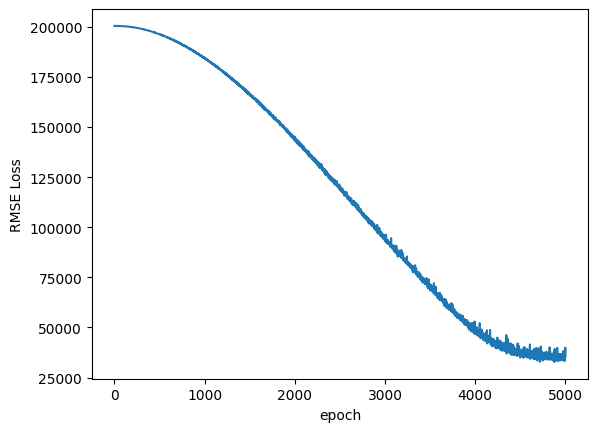

In [67]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [68]:
# vaidating the test data
y_pred=''
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,ytest))
print(f'RMSE: {loss}')

RMSE: 48541.8828125


# find the difference in the prices from actual to predictions

In [70]:
data_verify=pd.DataFrame(ytest.tolist(),columns=['Test'])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=['Prediction'])

In [71]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,162262.515625,-32262.515625
1,138887.0,184557.781250,-45670.781250
2,175500.0,152551.687500,22948.312500
3,195000.0,267787.968750,-72787.968750
4,142500.0,187093.062500,-44593.062500
